Station Name | URL
------------|-----
Wallops Island | https://www.ndbc.noaa.gov/station_page.php?station=44089
VA Beach | https://www.ndbc.noaa.gov/station_page.php?station=44088
Deep water Cape Hatteras | https://www.ndbc.noaa.gov/station_page.php?station=41001

In [27]:
import pandas as pd
url = 'https://www.ndbc.noaa.gov/data/hourly2/hour_00.spec'
df_spec = pd.read_fwf(url,header=0,skip_row=1)
df_spec.drop(index=0,inplace=True)
df_spec

,#STN,#YY,MM,DD,hh,mm,WVHT,SwH,SwP,WWH,WWP,SwD,WWD STEEPNESS,APD,MWD
1,41001,2021,09,09,00,40,2.3,2.2,13.8,0.2,2.1,ESE,SSW SWELL,11.4,118
2,41002,2021,09,09,00,40,2.5,2.5,13.8,0.1,3.8,ESE,SSE SWELL,12.0,110
3,41004,2021,09,09,00,40,1.3,1.1,14.8,0.7,4.2,ESE,SW SWELL,5.7,122
4,41008,2021,09,09,00,00,1.2,1.1,14.8,0.6,3.6,ESE,SSW SWELL,5.9,107
5,41009,2021,09,09,00,40,1.2,1.0,14.8,0.5,2.9,ESE,SSE SWELL,5.7,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,52200,2021,09,09,00,56,1.0,0.2,10.5,0.9,9.1,ESE,E AVERAGE,5.3,92
366,52200,2021,09,09,00,26,1.0,0.2,10.5,1.0,7.7,E,E AVERAGE,5.5,88
367,LJPC1,2021,09,09,00,20,0.5,0.3,5.0,0.3,3.7,NaN,N/A N/A,MM,-99
368,SSBN7,2021,09,09,00,47,1.0,MM,MM,MM,MM,MM,MM VERY_STEEP,MM,154


In [89]:
stations = ['44089','44088','41001']

df=pd.DataFrame()
for sta in stations:
    url = 'https://www.ndbc.noaa.gov/data/realtime2/%s.spec' % sta
    df_sta = pd.read_fwf(url, parse_dates={'date':['#YY','MM','DD','hh','mm']})
    df_sta['station'] = sta
    df_sta.drop(index=0,inplace=True)
    #df_sta = df_sta.infer_objects()
    df_sta['date']=pd.to_datetime(df_sta['date'], format='%Y %m %d %H %M')
    df_sta.set_index('date',inplace=True)
    df_sta['SwH'] = df_sta['SwH'].astype(float)
    #df_sta['WVHT'] = df_sta['WVHT'].astype(float)
    
    
    df = pd.concat([df, df_sta])

In [90]:
df

,WVHT,SwH,SwP,WWH,WWP,SwD,WWD STEEPNESS,APD,MWD,station,WWD,STEEPNESS
date,,,,,,,,,,,,
2021-09-09 02:26:00,1.7,0.8,14.3,1.5,4.8,ESE,S VERY_STEEP,4.9,186,44089,NaN,NaN
2021-09-09 01:56:00,1.7,0.8,15.4,1.5,5.0,ESE,S VERY_STEEP,4.8,190,44089,NaN,NaN
2021-09-09 01:26:00,1.8,1.0,14.3,1.5,4.3,ESE,S AVERAGE,5.0,107,44089,NaN,NaN
2021-09-09 00:56:00,1.6,1.0,14.3,1.2,4.2,E,S AVERAGE,5.2,97,44089,NaN,NaN
2021-09-09 00:26:00,1.3,1.0,14.3,0.9,4.0,ESE,SSE SWELL,5.8,109,44089,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26 04:40:00,0.9,0.8,9.1,0.4,4.5,SSE,NaN,5.3,148,41001,SSE,SWELL
2021-07-26 03:40:00,0.9,0.8,7.7,0.4,3.8,SSE,NaN,5.4,147,41001,S,AVERAGE
2021-07-26 02:40:00,0.9,0.8,7.1,0.4,3.6,SSE,NaN,5.3,161,41001,S,AVERAGE


In [91]:
df_group = df.groupby(by='station')

In [92]:
df_group.describe()

SwH                                             
          count      mean       std  min  25%  50%  75%  max
station                                                     
41001    1080.0  0.907685  0.587896  0.0  0.6  0.8  1.0  4.6
44088    2150.0  0.304000  0.231275  0.1  0.2  0.2  0.3  1.6
44089    2157.0  0.212888  0.156287  0.1  0.1  0.2  0.2  1.4

station
41001    AxesSubplot(0.125,0.2;0.775x0.68)
44088    AxesSubplot(0.125,0.2;0.775x0.68)
44089    AxesSubplot(0.125,0.2;0.775x0.68)
Name: SwH, dtype: object

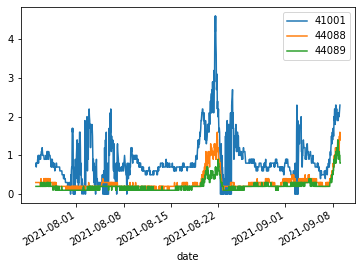

In [94]:
df_group['SwH'].plot(legend=True)